# Homework 1 Exercice 1

In [1]:
import numpy as np

In [2]:
def sign(x):
    return 1*(x >=0) - 1*(x <0)

In [9]:
class HopfieldNetwork:
    
    def _compute_weight(self,diag_null):
        W = (self.patterns@self.patterns.T)/self.N
        if diag_null:
            np.fill_diagonal(W,0) 
        return W
            
        
    def __init__(self,patterns,diag_null=True):
        self.patterns = patterns
        self.N = self.patterns.shape[0]
        self.P = self.patterns.shape[1]
        
        self.W = self._compute_weight(diag_null)
    
    def _next_step(self,s,asyncro = True,random=False,index = None,copy=False):
        
        s = np.array(s,copy=copy)
        if asyncro:
            if random:
                i=np.random.randint(s.shape[0])
                s[i] = sign(self.W[i,:]@s)
                return s
            elif not(index==None):
                s[index] = sign(self.W[index,:]@s)
                return s
            else:  
                for i in range(s.shape[0]):
                    s[i] = sign(self.W[i,:]@s)
                return s
        else:  
            return sign(self.W@s)
    
    def _show_pattern(self,s):
        pass
    
    def converge_to_steady_state(self,s,nb_iteration=100,asyncro=True,random_async=False,stdout = True):
        
        i = 0
        continue_var = True
        
        while continue_var and i<nb_iteration:
        
            old_s = s
            s =self._next_step(s,asyncro,random_async)
        
            if stdout:
                print(f"{i}\n")
                self._show_pattern(s)

            if(s==old_s).all() and not(asyncro):
                continue_var = False
            
            i = i+1
            
        return s


In [10]:
def generate_pattern(p,N=120):
    return np.random.choice([-1,1],size=(N,p)) 

In [54]:
def get_error(p,n_trial,diag_null=True,verbose=True):
    e = 0
    for i in range(n_trial):

        patterns = generate_pattern(p)
        hn = HopfieldNetwork(patterns,diag_null=diag_null)

        pattern_index = np.random.randint(patterns.shape[1])

        s = hn._next_step(patterns[:,pattern_index],asyncro=True,random=True,copy=True)

        e = e + (1-(s==patterns[:,pattern_index]).all())
         
    return e/n_trial

In [39]:
n_trial = int(1e5)

In [40]:
P = np.array([12,24,48,70,100,120])
errors= np.array([get_error(p,n_trial) for p in P])

In [55]:
errors_diag_not_null = np.array([get_error(p,n_trial,diag_null=False) for p in P])

In [56]:
from scipy.special import erf

In [57]:
def theorical_error(N,p):
    return (1-erf(np.sqrt(N/(2*p))))/2
theorical_errors = np.array([theorical_error(120,p) for p in P])

In [58]:
import matplotlib.pyplot as plt

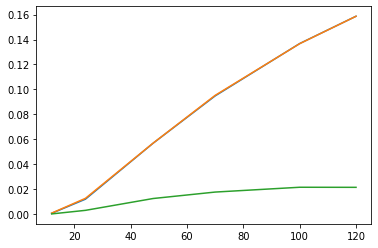

In [60]:
plt.plot(P,errors)
plt.plot(P,theorical_errors)
plt.plot(P,errors_diag_not_null)

It is quite similar :) (not for non null diag)

In [52]:
(errors-theorical_errors).mean()

-0.0002067890769054425

in fact it is near 0

In [53]:
errors

array([0.00063, 0.01199, 0.05685, 0.09476, 0.13677, 0.15867])

In [61]:
errors_diag_not_null

array([0.00015, 0.00302, 0.0125 , 0.01767, 0.02153, 0.02147])